In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/scratch/anissa.el/macro_micro_niches/macro_micro_niches2022/TMENS_analysis/notebooks/keren_building_blocks_analysis'

In [2]:
import pandas as pd
from skimage import io
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from src.CellAbundance import CellAbundance, generate_abundance_matrix, join_abundance_matrices
from src.utils.visualization import radius_pc_heatmap, plot_cells_positions, plot_cev_radius, plot_stacked_var_radius, radius_pc_all_variance, radius_pc_variance_contourf

In [3]:
N_SITE = 100
PATIENT_ID = 4
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']
METHOD = 'abs'
PCA_SCALED = False
ROOT_DATA_PATH = "../../data/cell_positions_data"
patient_ids = [1, 2, 3, 4, 5]
radius = np.linspace(np.log(5), np.log(390), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

In [4]:
abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root=ROOT_DATA_PATH) for r in radius} for p in patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=PCA_SCALED)

expr_var = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}

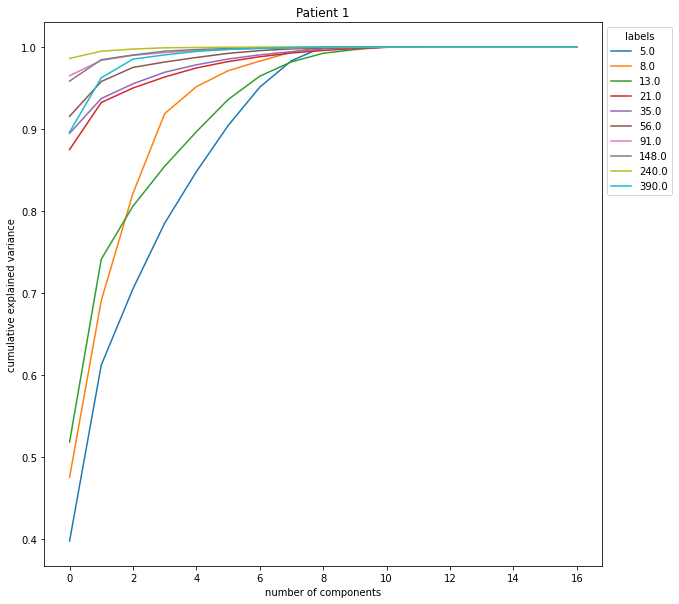

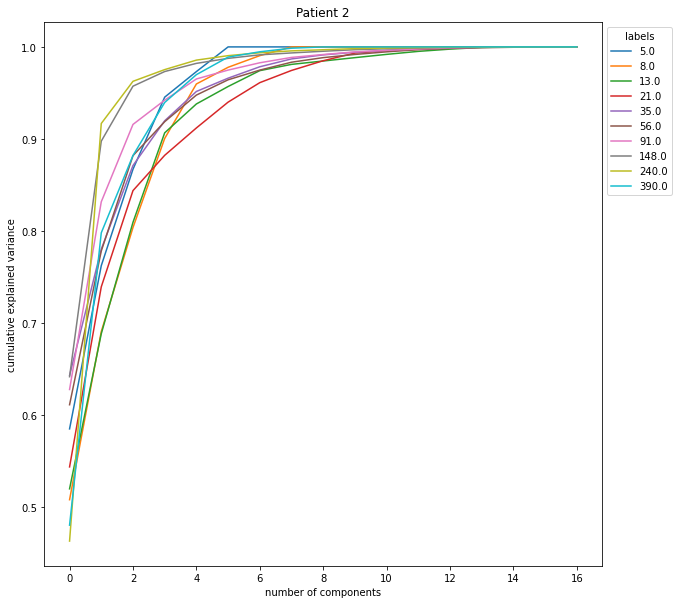

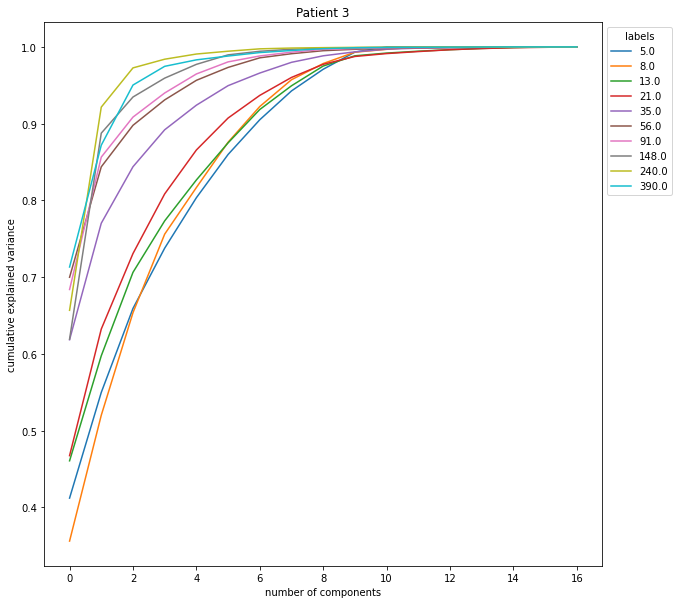

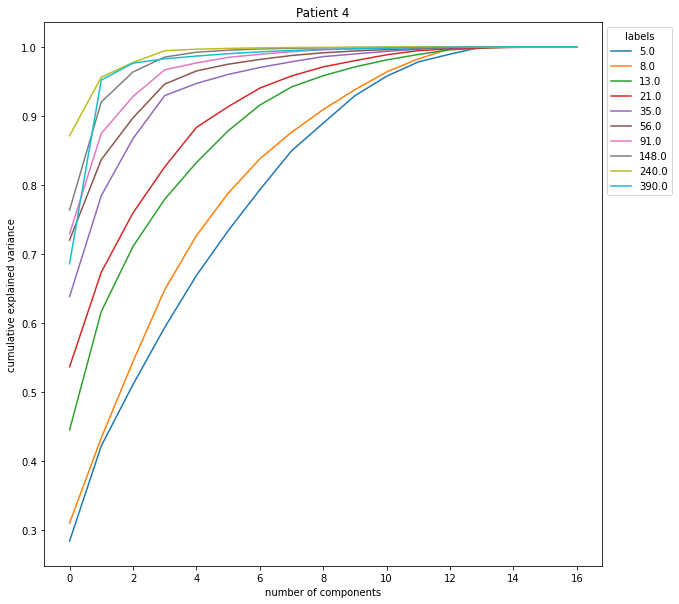

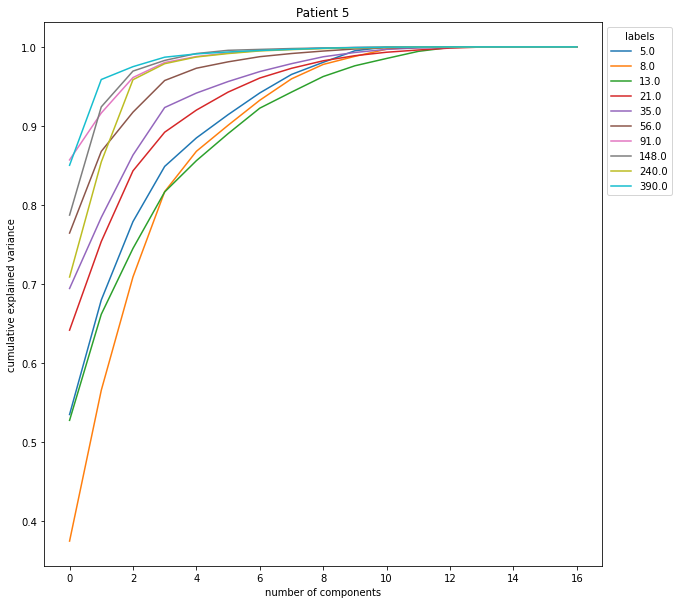

In [5]:
for p in patient_ids:
    plot_cev_radius(expr_var[p], p)

In [6]:
expl_var_ratio = {p: {r: ca.pca.explained_variance_ratio_ for r, ca in v.items()} for p, v in abundances.items()}

In [7]:
#expl_var_ratio

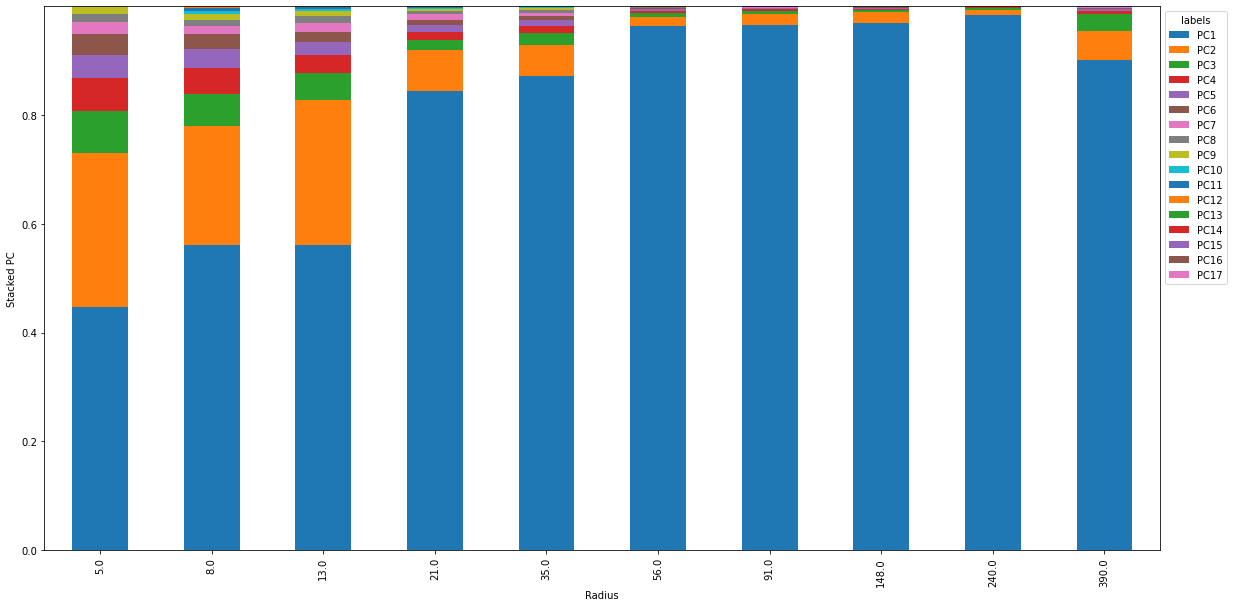

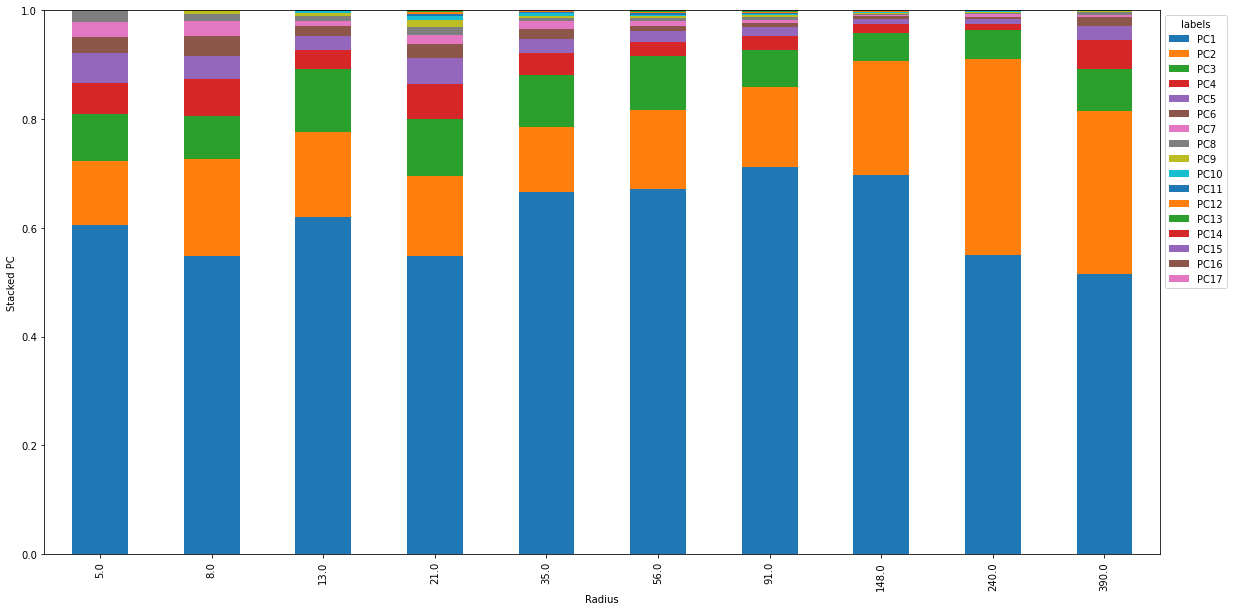

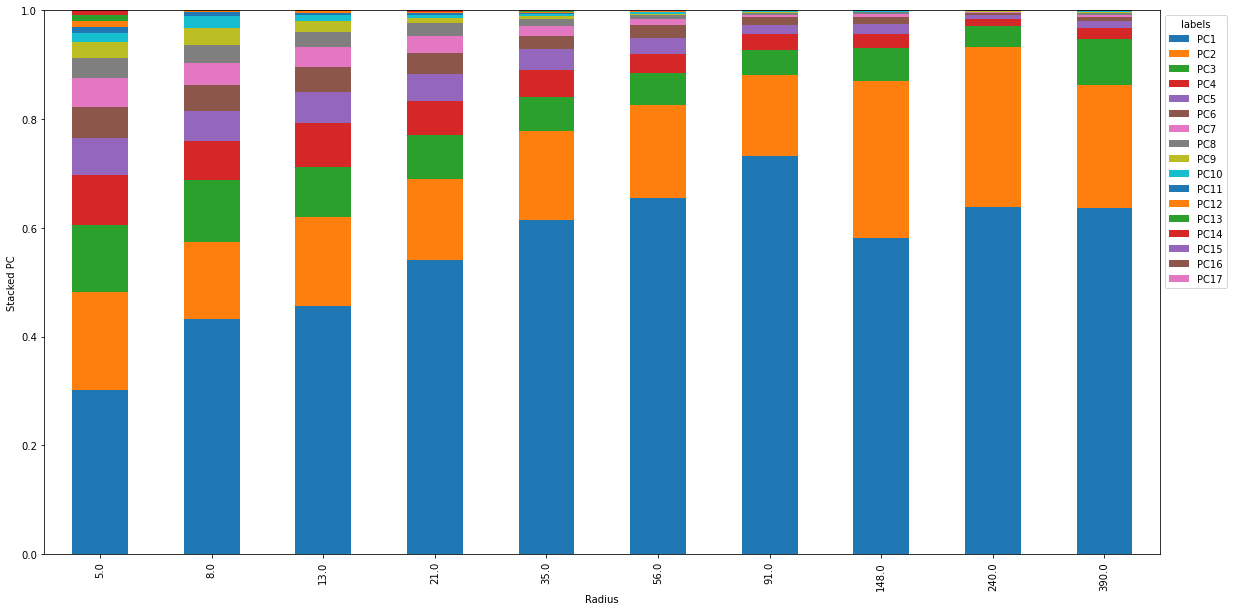

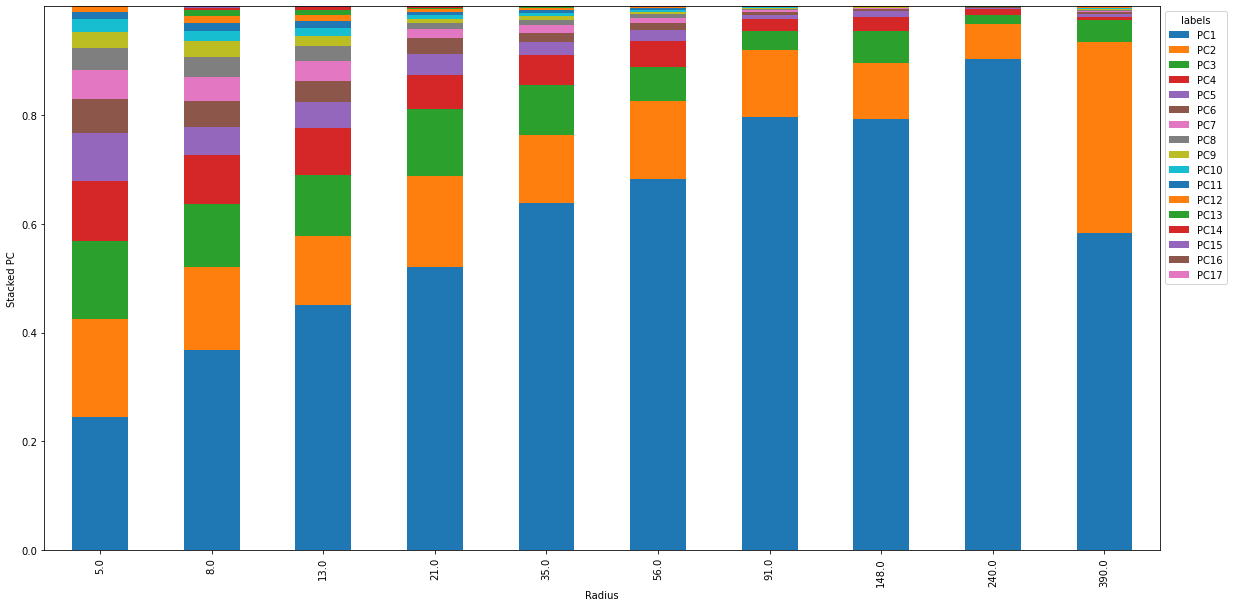

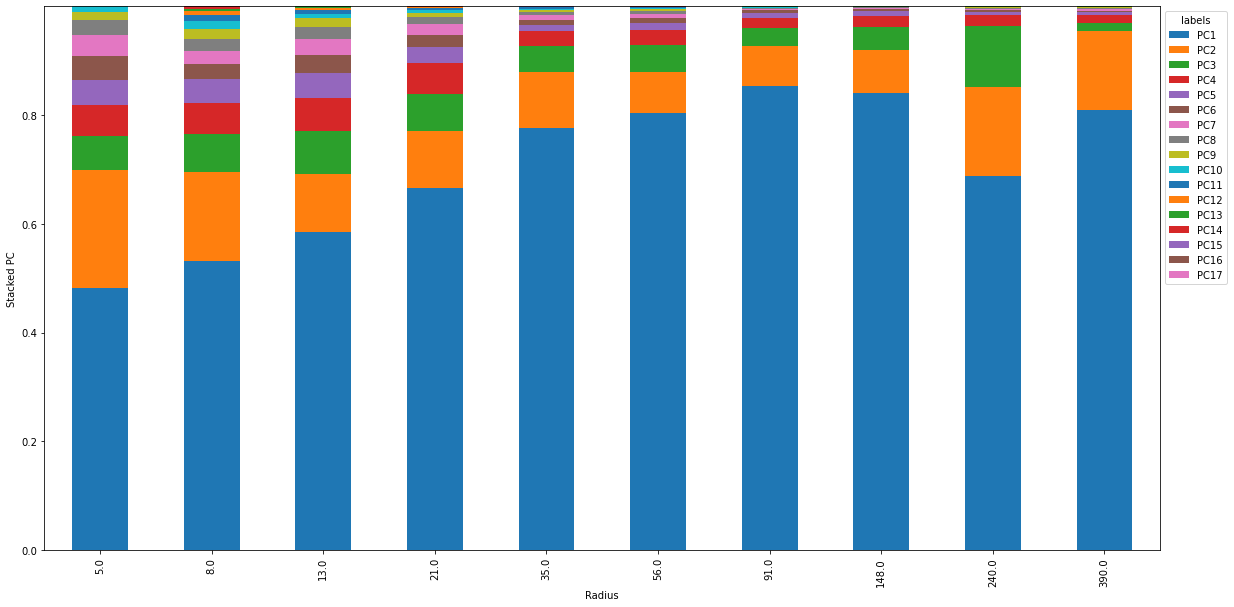

In [8]:
for p in patient_ids:
    plot_stacked_var_radius(expl_var_ratio[p])

## Absolute Count radius PC analysis

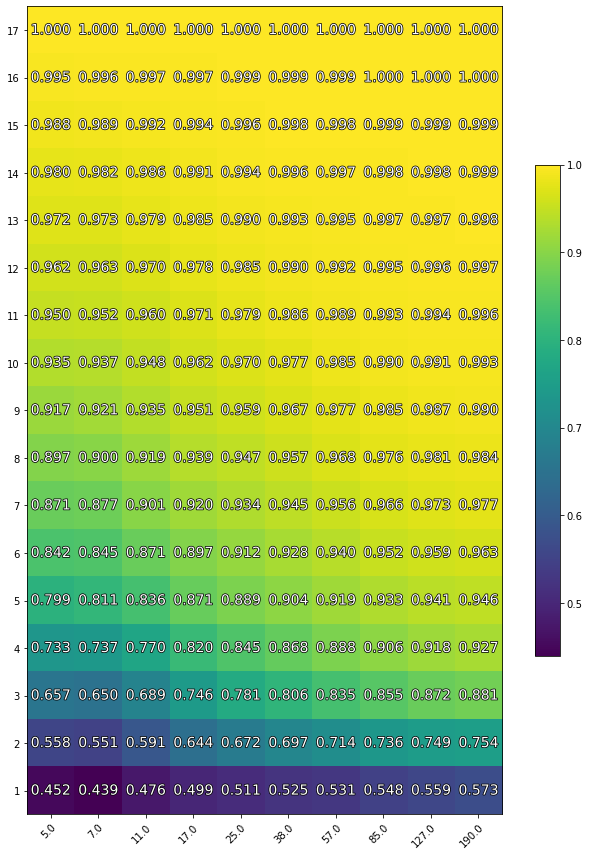

In [9]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
ROOT_DATA_PATH = "../../data/cell_positions_data"
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']

radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

expl_var_ratio = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method='abs', snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids,s_ids,_ = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    pc = pca.fit_transform(sites)
    expl_var_ratio[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio)

## Gaussian weigthing counting

5.0
7.0
11.0
17.0
25.0
38.0
57.0
85.0
127.0
190.0


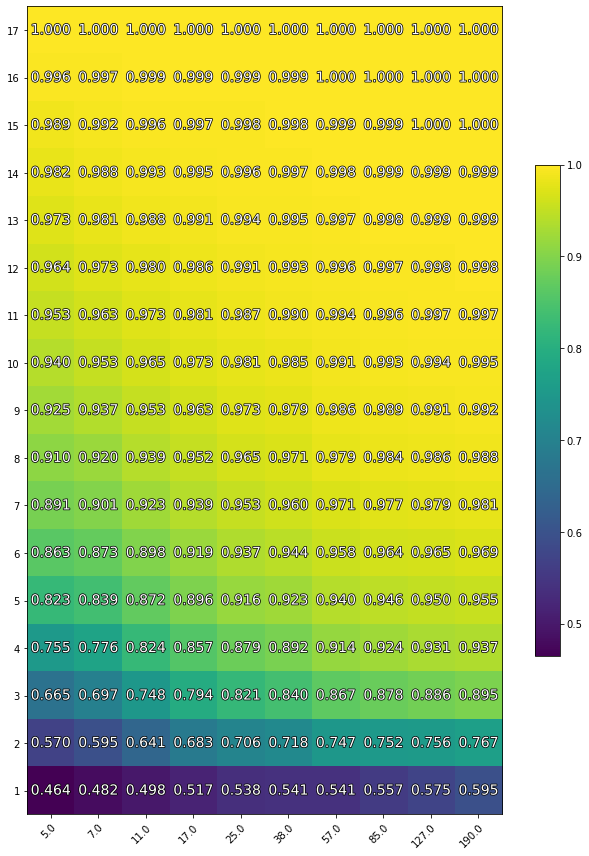

In [7]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
ROOT_DATA_PATH = "../../data/cell_positions_data" #"../../../fabio/output/cell_positions_data"
CELL_TYPES = ['CD8-T', 'Other immune', 'DC / Mono', 'CD3-T', 'B', 'NK', 'Keratin-positive tumor', 'Tumor', 
              'CD4-T', 'Mesenchymal-like', 'Macrophages', 'Endothelial', 'Tregs', 'Unidentified', 'DC', 'Mono / Neu', 
              'Neutrophils']

radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))
METHOD = 'gaussian'

expl_var_ratio_gauss = {}
for r in radius:
    print(r)
    #abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    gaussian_count_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method=METHOD, snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids,s_ids, _ = join_abundance_matrices(gaussian_count_list)
    pca = PCA()
    pc = pca.fit_transform(sites)
    expl_var_ratio_gauss[r] = np.cumsum(pca.explained_variance_ratio_)
radius_pc_heatmap(expl_var_ratio_gauss)

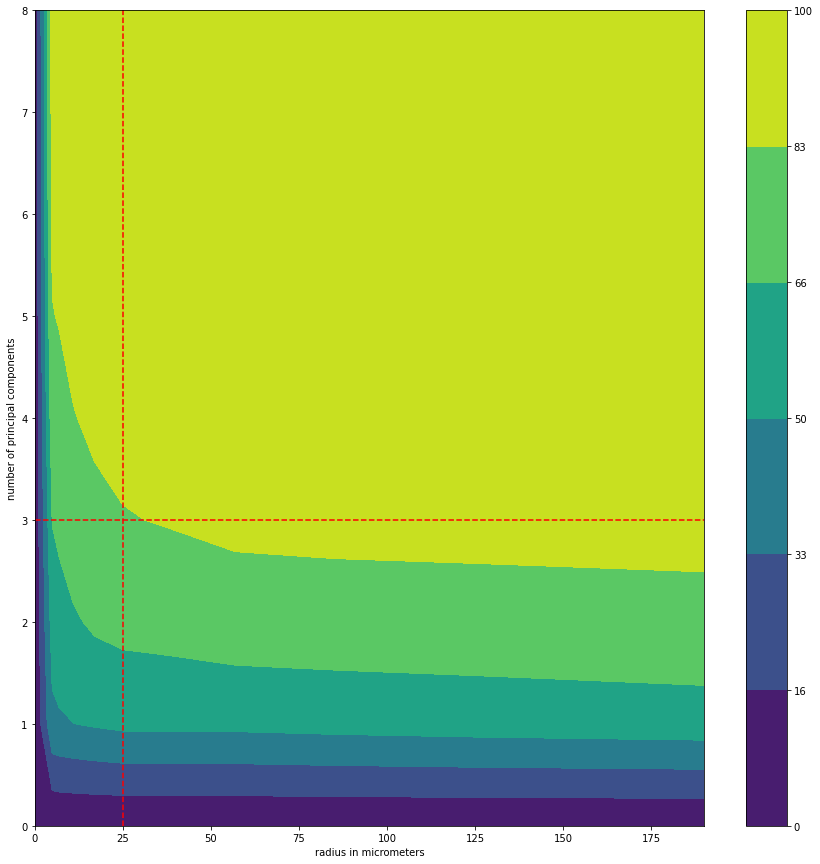

In [20]:
radius_pc_all_variance(expl_var_ratio_gauss,radius_lim=25,nPC_lim=3,
                       save_fig=True, path_fig="../../output/figs/plot_rad_var_gauss.svg")
#plt_radius_var.savefig("plot_rad_var_gauss.svg")#/srv/mfs/hausserlab/anissa.el/figs/

# Random stuff

In [69]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]

abundances = {p: {r: CellAbundance(p, N_SITE, r, CELL_TYPES, method=METHOD, snr=1, root=ROOT_DATA_PATH) for r in radius} for p in full_patient_ids}
for p, v in abundances.items():
    for r, ca in v.items():
        ca.perform_PCA(scale=False)#PCA_SCALED
expl_var_ratio = {p: {r: np.cumsum(ca.pca.explained_variance_ratio_) for r, ca in v.items()} for p, v in abundances.items()}


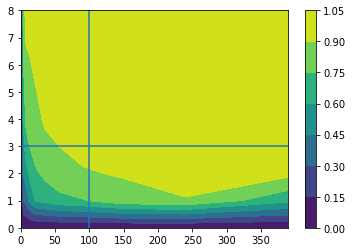

In [70]:
def get_explained_variance_matrix(X, Y, expl_var_ratio):
    z = np.empty((X.shape[0], Y.shape[1]))
    for i, x in enumerate(X.T):
        if x[0] != 0:
            z[:, i] = np.insert(expl_var_ratio[p][x[0]], 0, 0.0)
        else:
            z[:, i] = np.zeros(18)
    
    return z
    
p = 4
x = [0] + list(expl_var_ratio[p].keys())
y = np.arange(0, 18)
X, Y = np.meshgrid(x, y)
Z = get_explained_variance_matrix(X, Y, expl_var_ratio)
plt.contourf(X, Y, Z)
plt.axvline(x=100)
plt.axhline(y=3)
plt.ylim(0, 8)
plt.colorbar()
plt.show()

In [17]:
x = np.vstack(list(expl_var_ratio.values()))
x.shape[1]

17

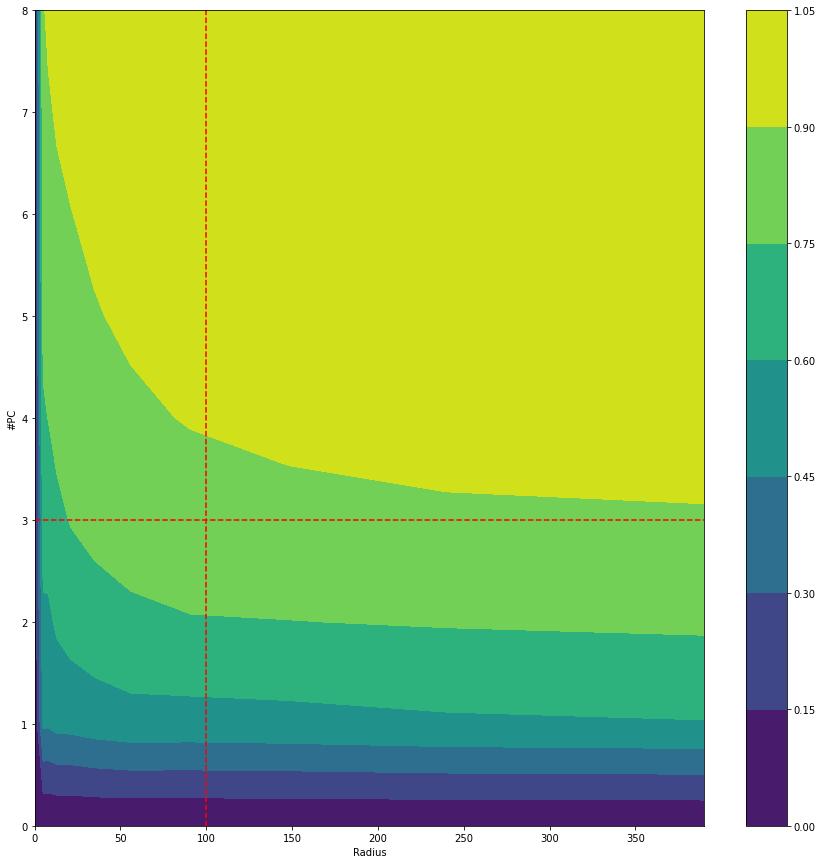

In [6]:
radius_pc_all_variance(expl_var_ratio)

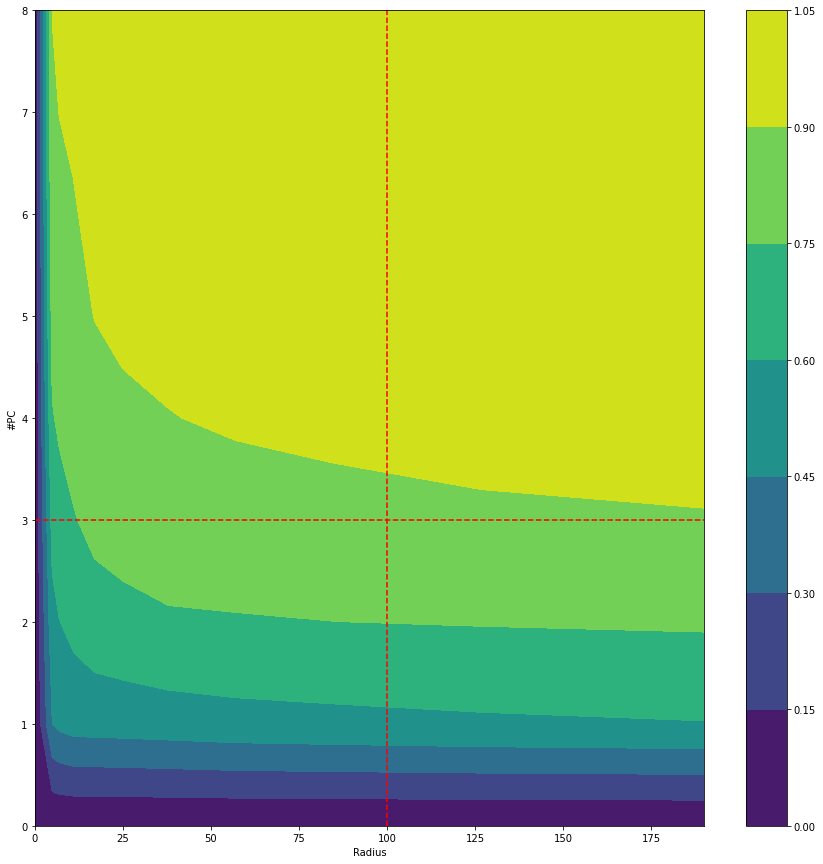

In [9]:
full_patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
ROOT_DATA_PATH = "../../data/cell_positions_data"
radius = np.linspace(np.log(5), np.log(190), num=10)
radius = np.rint(np.power(np.e, radius).astype(float))

expl_var_ratio = {}
for r in radius:
    abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, full_patient_ids, N_SITE, r, method='gaussian', snr=3, root=ROOT_DATA_PATH)
    sites, patient_ids = join_abundance_matrices(abs_log_ca_list)
    pca = PCA()
    pc = pca.fit_transform(sites)
    expl_var_ratio[r] = np.cumsum(pca.explained_variance_ratio_)
expl_var_ratio
radius_pc_all_variance(expl_var_ratio)

In [10]:
expl_var_ratio

{5.0: array([0.44842197, 0.55314386, 0.65264551, 0.73887744, 0.80257109,
        0.84619015, 0.88071995, 0.90277277, 0.92233201, 0.9399949 ,
        0.95715258, 0.97084161, 0.9792621 , 0.98640806, 0.99284839,
        0.9975072 , 1.        ]),
 7.0: array([0.48469251, 0.59705479, 0.69177756, 0.77428082, 0.83639811,
        0.87066537, 0.90143066, 0.91956275, 0.93569301, 0.94857889,
        0.96048747, 0.97041017, 0.97882101, 0.98639471, 0.99198431,
        0.99666758, 1.        ]),
 11.0: array([0.51345021, 0.63557947, 0.73929672, 0.81273252, 0.86566405,
        0.89206858, 0.91474383, 0.93398872, 0.94879891, 0.96292104,
        0.97287759, 0.97993784, 0.98604884, 0.99177752, 0.99503554,
        0.99774974, 1.        ]),
 17.0: array([0.51832773, 0.68023815, 0.79284417, 0.86057744, 0.9020245 ,
        0.92579697, 0.94269955, 0.95632288, 0.96532554, 0.97390413,
        0.98190392, 0.9865651 , 0.99095295, 0.99496852, 0.99714426,
        0.99879839, 1.        ]),
 25.0: array([0.52344203, 

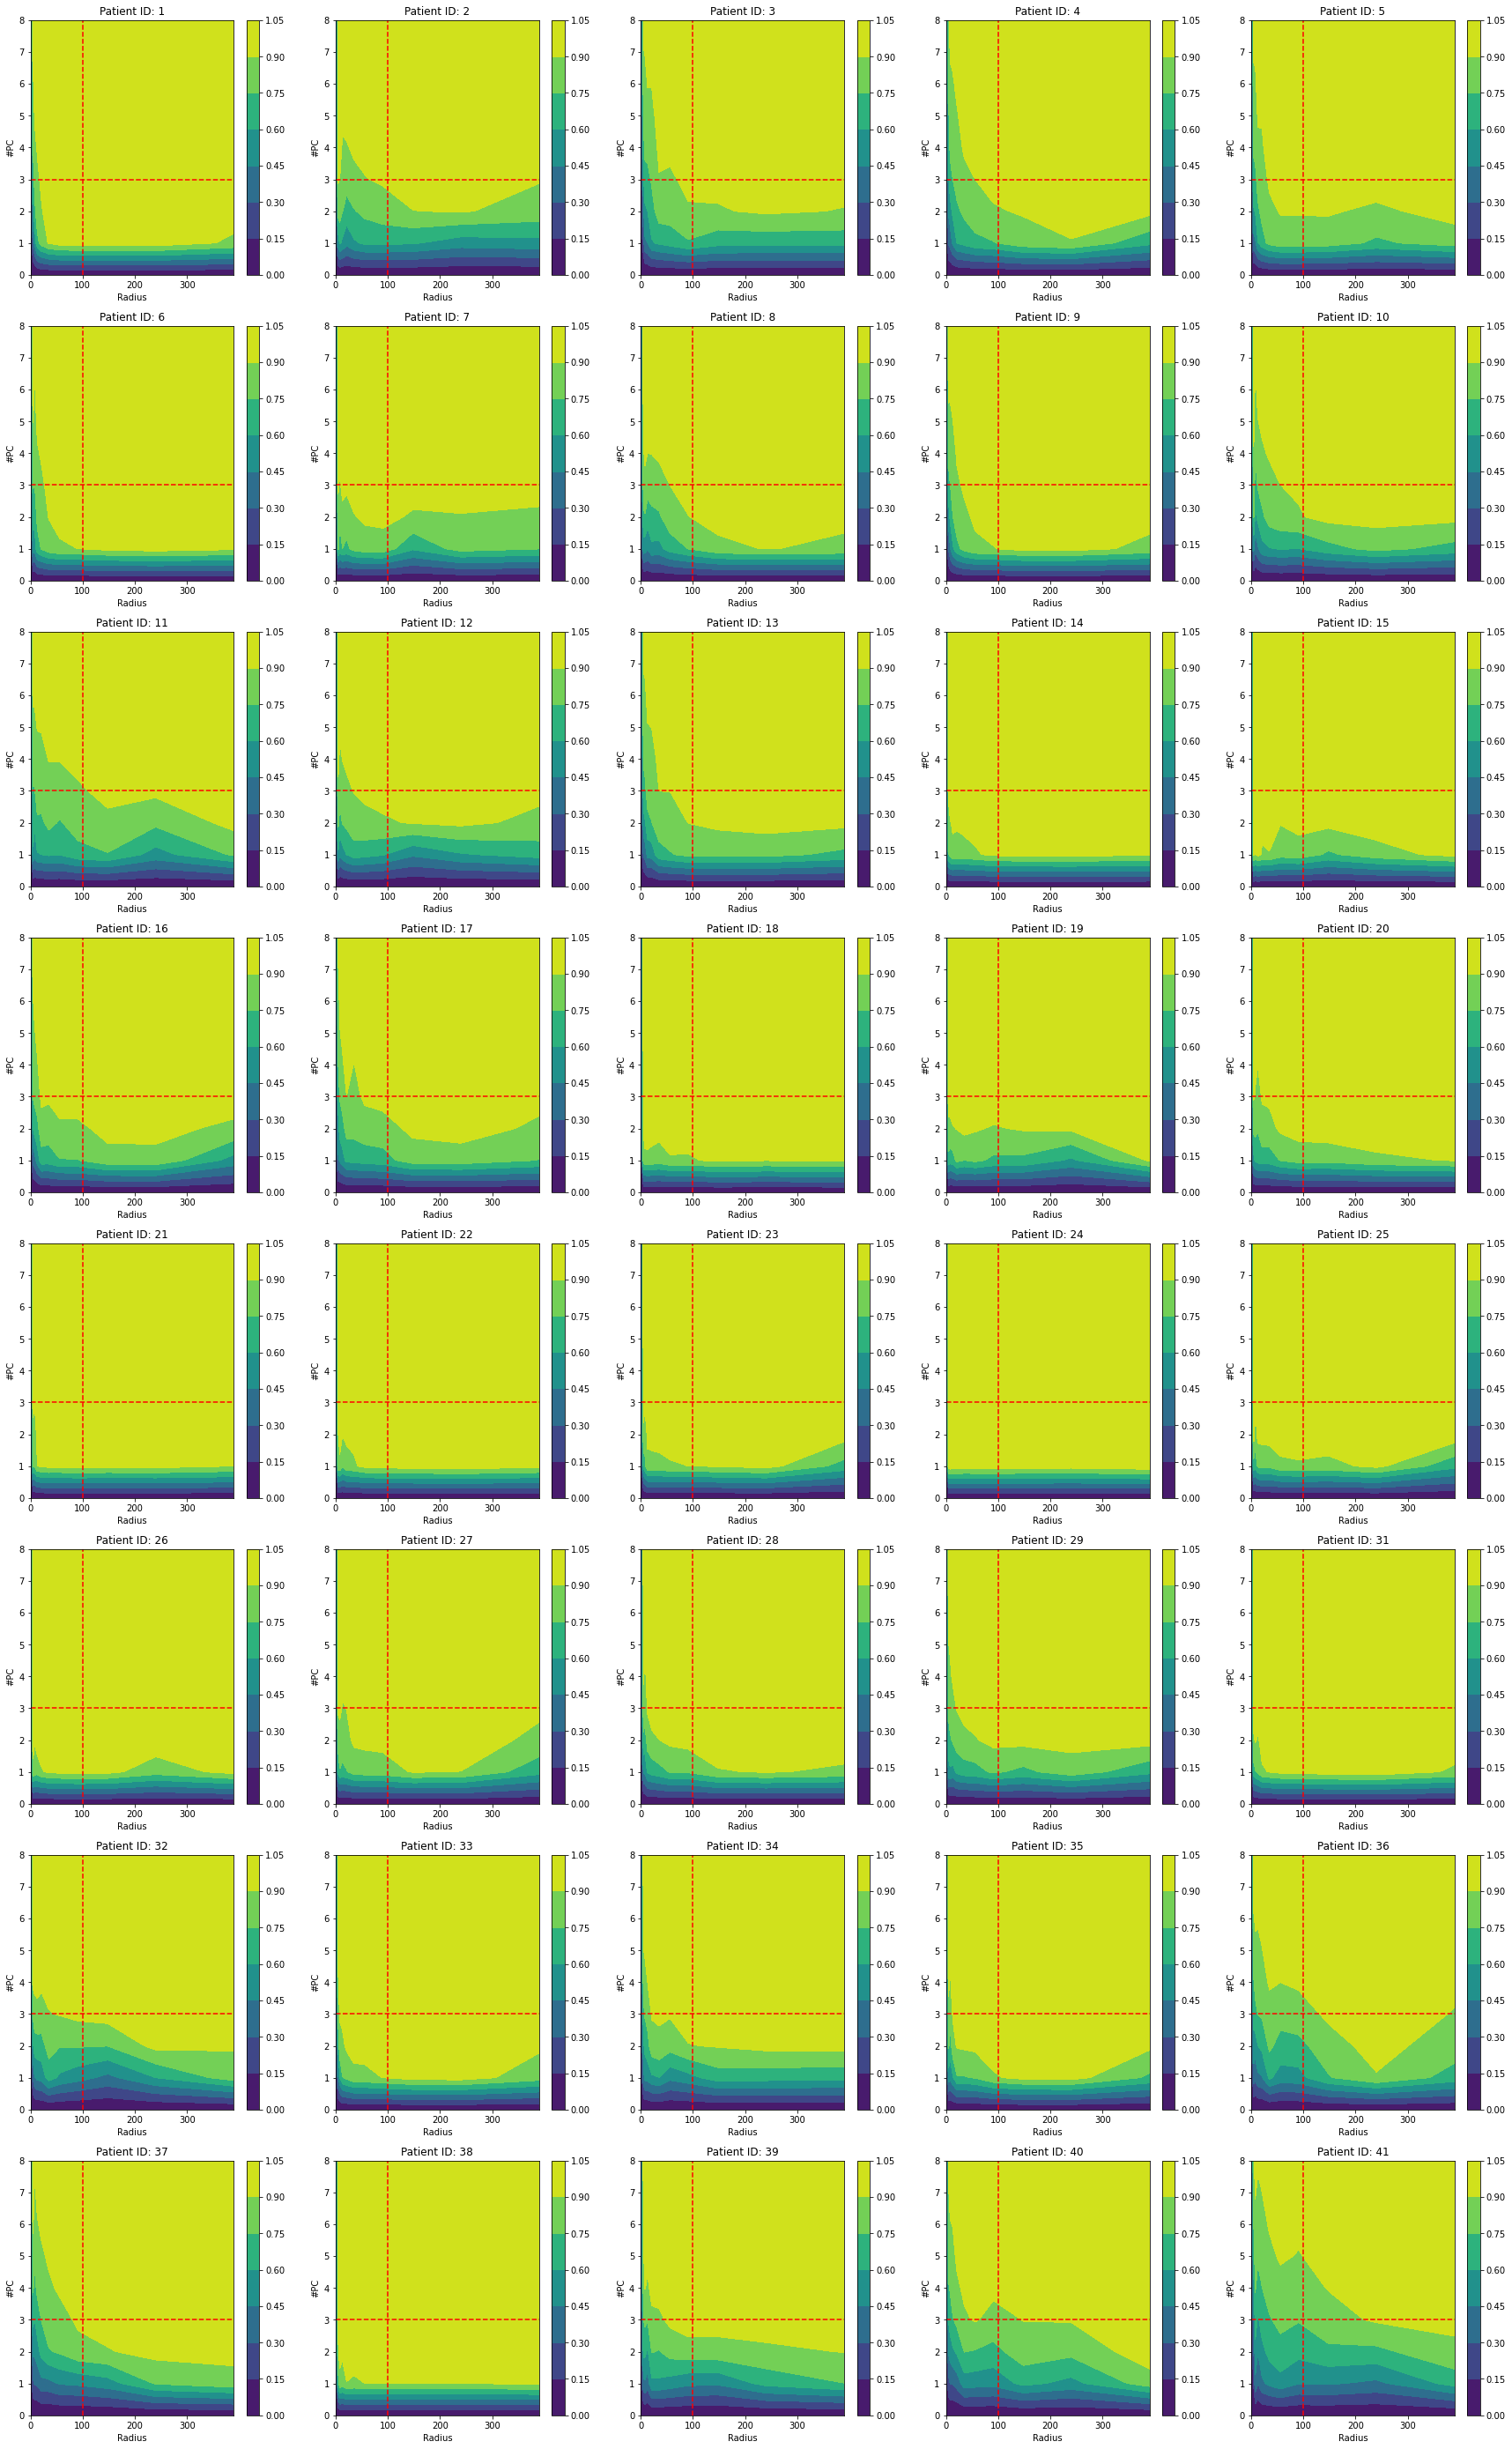

In [71]:
radius_pc_variance_contourf(full_patient_ids, expl_var_ratio)